In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data,wb
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [6]:
# bank of america
BAC=data.DataReader('BAC','yahoo',start,end)

#citi group
C=data.DataReader('C','yahoo',start,end)

#Goldman Sachs 
GS=data.DataReader('GS','yahoo',start,end)

#JPMOrgan Chase
JPM=data.DataReader('JPM','yahoo',start,end)

#MOrgan Stanley
MS=data.DataReader('MS','yahoo',start,end)

#Wells Fargo
WFC=data.DataReader('WFC','yahoo',start,end)

In [12]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [13]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [14]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [15]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [18]:
bank_stocks.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   

Bank Ticker         MS                                      WFC             \
Stock Info        Open      Close     Volume  Adj Close    High        Low   
Date                                                                         
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555  31.309999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  

[3 rows x 36 columns]

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [21]:
for tick in tickers:
    print( tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [22]:
returns=pd.DataFrame()

In [23]:
BAC['Close'].pct_change().max()

0.35269125610998264

In [24]:
for tick in tickers:
    returns[tick+'returns']=bank_stocks[tick]['Close'].pct_change()

In [25]:
returns.head()

BACreturns  Creturns  GSreturns  JPMreturns  MSreturns  WFCreturns
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

In [26]:
returns.columns.names=['returns']

In [27]:
returns.head()

returns     BACreturns  Creturns  GSreturns  JPMreturns  MSreturns  WFCreturns
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

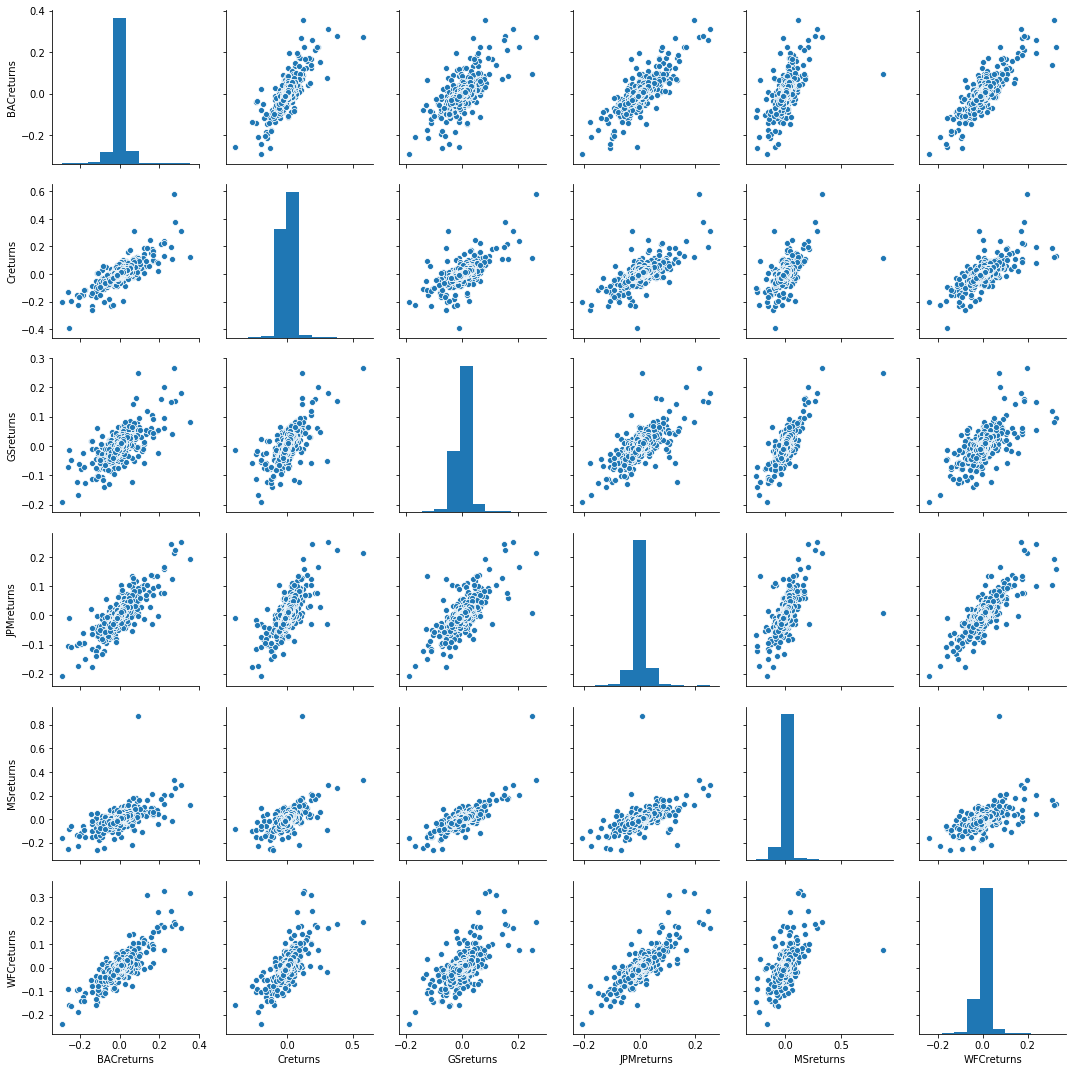

In [30]:
sns.pairplot(data=returns)

In [31]:
returns.idxmax()

returns
BACreturns   2009-04-09
Creturns     2008-11-24
GSreturns    2008-11-24
JPMreturns   2009-01-21
MSreturns    2008-10-13
WFCreturns   2008-07-16
dtype: datetime64[ns]

In [32]:
returns.idxmin()

returns
BACreturns   2009-01-20
Creturns     2009-02-27
GSreturns    2009-01-20
JPMreturns   2009-01-20
MSreturns    2008-10-09
WFCreturns   2009-01-20
dtype: datetime64[ns]

In [33]:
returns.std()

returns
BACreturns    0.036647
Creturns      0.038672
GSreturns     0.025390
JPMreturns    0.027667
MSreturns     0.037819
WFCreturns    0.030238
dtype: float64

In [38]:
returns.ix['2015-01-01':'2015-12-31'].std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


returns
BACreturns    0.016163
Creturns      0.015289
GSreturns     0.014046
JPMreturns    0.014017
MSreturns     0.016249
WFCreturns    0.012591
dtype: float64

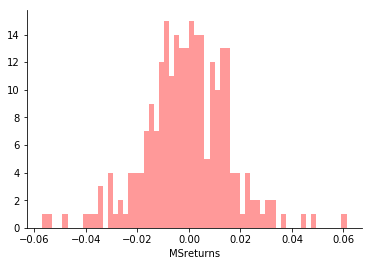

In [39]:
#distplot for ms
rdata=returns.loc['2015-01-01':'2015-12-31']['MSreturns']
sns.distplot(rdata,bins=60,color='red',kde=False)
sns.despine()

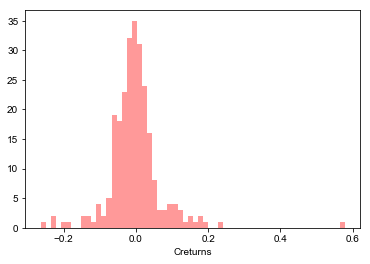

In [40]:
cdata=returns.loc['2008-01-01':'2008-12-31']['Creturns']
sns.distplot(cdata,bins=60,color='red',kde=False)
#sns.despine()
sns.set_style('whitegrid')

In [41]:
import cufflinks as cf
cf.go_offline()
import plotly as py

In [42]:
bank_stocks.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   

Bank Ticker         MS                                      WFC             \
Stock Info        Open      Close     Volume  Adj Close    High        Low   
Date                                                                         
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555  31.309999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  

[3 rows x 36 columns]

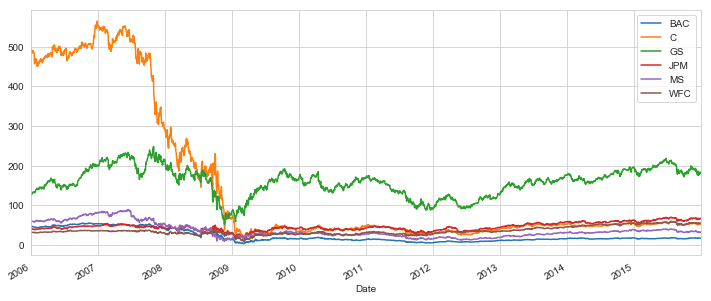

In [43]:
for tick in tickers:
    tick,bank_stocks[tick]['Close'].plot(figsize=(12,5),label=tick)
    plt.legend()

In [47]:
bank_stocks.head(3)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.523922  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.146645  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.191933  487.799988  484.000000  484.399994  486.200012  ...   

Bank Ticker         MS                                      WFC             \
Stock Info        Open      Close     Volume  Adj Close    High        Low   
Date                                                                         
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555  31.309999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  

[3 rows x 36 columns]

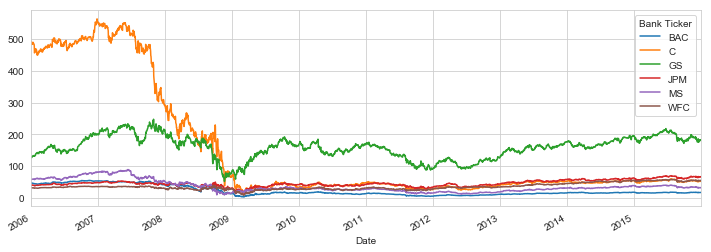

In [50]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot(figsize=(12,4))

In [51]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).iplot()

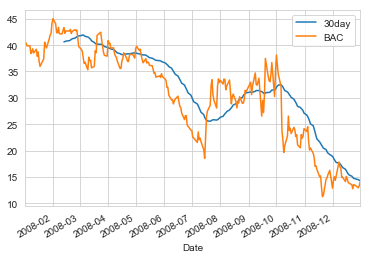

In [52]:
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30day')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC')
plt.legend()

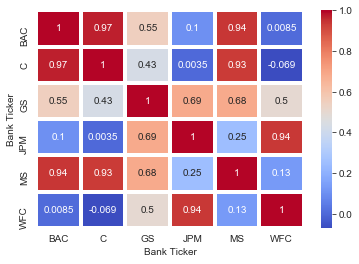

In [54]:
hdata=bank_stocks.xs(key='Close',level='Stock Info',axis=1)
x=hdata.corr()
sns.heatmap(data=x,cmap='coolwarm',linewidth=3,linecolor='white',annot=True)

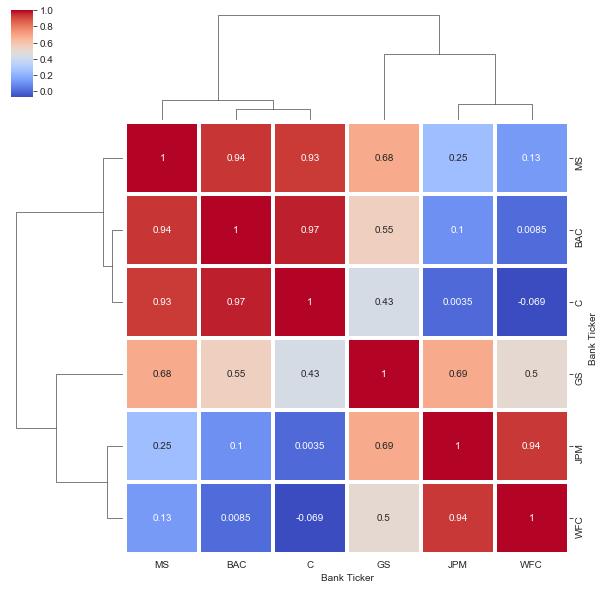

In [55]:
sns.clustermap(data=x,cmap='coolwarm',linewidth=3,linecolor='white',annot=True)

In [56]:
x.iplot(kind='heatmap',color='coolwarm')

In [57]:
y=bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']
y.iplot(kind='candle')

In [58]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [59]:
bank_stocks['MS'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma')

In [60]:
bank_stocks['BAC'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')